# Email Domains #

## Import libraries ##

Import the librarires we will be using for this assignment.

In [2]:
# Import the libraries required for this assignment
import pandas as pd
import matplotlib.pyplot as plt

## Read, write and summarize the raw data ##

In [3]:
# Read data into pandas data frame.
df = pd.read_csv('https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download')

# Write a local copy of the data
df.to_csv('data/df_email_domains_raw.csv')

# Produce initial (truncated) view of the Data Frame
df

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer
...,...,...,...,...,...,...,...,...,...
995,996,fedF4c7Fd9e7cFa,Kurt,Bryant,Female,lyonsdaisy@example.net,021.775.2933,1959-01-05,Personnel officer
996,997,ECddaFEDdEc4FAB,Donna,Barry,Female,dariusbryan@example.com,001-149-710-7799x721,2001-10-06,Education administrator
997,998,2adde51d8B8979E,Cathy,Mckinney,Female,georgechan@example.org,+1-750-774-4128x33265,1918-05-13,Commercial/residential surveyor
998,999,Fb2FE369D1E171A,Jermaine,Phelps,Male,wanda04@example.net,(915)292-2254,1971-08-31,Ambulance person


In [4]:
# Provide general summary of Data Frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          1000 non-null   int64 
 1   User Id        1000 non-null   object
 2   First Name     1000 non-null   object
 3   Last Name      1000 non-null   object
 4   Sex            1000 non-null   object
 5   Email          1000 non-null   object
 6   Phone          1000 non-null   object
 7   Date of birth  1000 non-null   object
 8   Job Title      1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


## Initial Observations ##

1. The data is clean, containing no blank value nor NaNs.

2. The data contains personal information for 1,000 people including information on name (first & last), sex, email, phone, D.O.B and job title.

3. To create a pie chart on email domains, the `Email` column requires manipulation.

4. All emails have 3 letter domains in the format '.xxx' - confirmed using Reg Ex `\.[a-z][a-z][a-z]` on the file. Also confirmed by counting frequency of domain values (see below).


## Data Manipulation ##

Convert the `Email` column to dtype `string` for text manipulation.

In [100]:
# https://www.geeksforgeeks.org/string-manipulations-in-pandas-dataframe/
df['Email'].astype('string')

0                pwarner@example.org
1      fergusonkatherine@example.net
2                fhoward@example.org
3              zjohnston@example.com
4                   elin@example.net
                   ...              
995           lyonsdaisy@example.net
996          dariusbryan@example.com
997           georgechan@example.org
998              wanda04@example.net
999          deannablack@example.org
Name: Email, Length: 1000, dtype: string

Create `Domain` data series by stripping the last 4 digits from `Email` column.

In [15]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html
df['Domain'] = df['Email'].str.strip().str[-4:]
df['Domain']

0      .org
1      .net
2      .org
3      .com
4      .net
       ... 
995    .net
996    .com
997    .org
998    .net
999    .org
Name: Domain, Length: 1000, dtype: object

## Data Analysis ##

In [16]:
# Count the frequency of each Domain value.
#https://www.geeksforgeeks.org/calculate-the-frequency-counts-of-each-unique-value-of-a-pandas-series/
print (df['Domain'].value_counts())
sum_domains = df['Domain'].value_counts().sum()
print (f"The sum of domains is {sum_domains}.")

Domain
.org    341
.com    339
.net    320
Name: count, dtype: int64
The sum of domains is 1000.


## Visualisation: Pie Chart ##

Create pie chart based on the count for each domain.

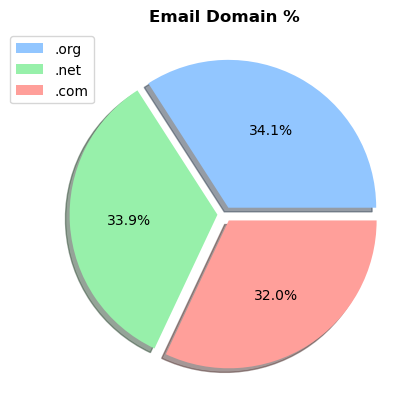

In [39]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
# https://www.geeksforgeeks.org/matplotlib-axes-axes-pie-in-python/

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title('Email Domain %', weight='bold')

# Create labels
labels = df['Domain'].unique()

# Set values for slice explosion
# https://how2matplotlib.com/matplotlib-pie-chart.html
explode = (0.05,0.05,0.05)

# Create pie chart
ax.pie(df['Domain'].value_counts(), autopct='%1.1f%%', explode=explode, shadow = True)

# Add legend
# https://matplotlib.org/stable/api/legend_api.html#matplotlib.legend.Legend
ax.legend(labels, loc = 'upper left', bbox_to_anchor=(-0.1,1))

## End ##